
# Assignment 2  <font color="blue"> (15 points) </font>

***

### General Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries.
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly.
  + If we want you to use a specific library, then we will state it clearly.
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells.
  + Use text cells for explanations. Use explanation and plain text as much as possible.
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows:
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors.
    
  Good luck!

In [1]:

# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(7 points)</font>

1. **<font color=blue> (1 point) </font>** Download `Credit.csv` from <http://www.statlearning.com/resources-first-edition> and upload it into this notebook. Print the first $5$ rows of the data. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results.
2. **<font color=blue> (0.5 points)</font>** Keep only `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, and `Balance` as your variables and throw the rest of variables away. Print the dimension of this new dataset.
3.  **<font color=blue> (0.5 points) </font>** Create a binary variable `Balance_1500` which equals $1$ for the observations with `Balance` $> 1500$, and equals $0$ otherwise.
4. **<font color=blue> (3 points) </font>** Model `Balance_1500` by the explanatory variables `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education` using the following models:
    + logistic regression,
    + linear discriminant, and
    + quadratic discriminant.
8. **<font color=blue> (0.5 points) </font>** Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   |
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

</br>
Compare the probabilities and comment.
    
9. **<font color=blue> (1.5 points) </font>** For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment.

### Answer to ## **Part A** <font color="blue"></font>

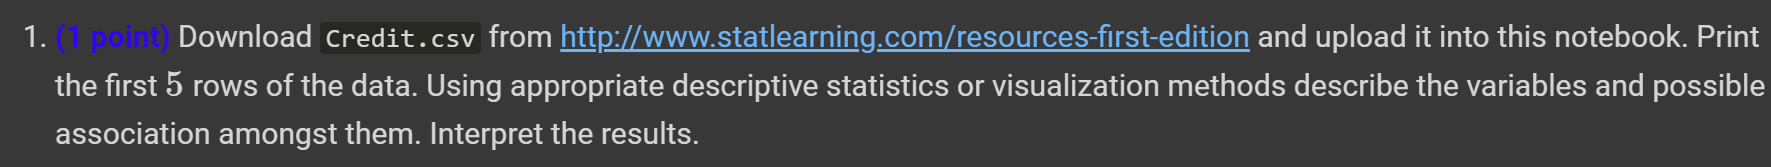

#### **A.1.1. Import Needed Libraries**

In [2]:
# Import Pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.preprocessing import scale

#### **A.1.2. Load Data and Print the first  5  rows of the data**

In [3]:
credit_original_df = pd.read_csv(filepath_or_buffer=r'Credit.csv')

# create a copy of the original dataframe - needed later
credit_df = credit_original_df.copy(deep=True)

# Use .head() to Print the first 5 rows of the data.
credit_df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


#### **A.1.3. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them**

In [4]:
credit_df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [5]:
credit_df.shape

(400, 11)

In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [7]:
str_=""
for column in credit_df:
     # display column name for all columns & distinct contents of each column ONLY for columns with less than 6 unique values
    columnSeriesObj = credit_df[column]
    str_ = 'Column Name: ' + column + ', Column Type: ' + str(credit_df[column].dtype)
    if len(columnSeriesObj.unique()) <= 5:
      str_ = str_ + ', Column Contents : '
      for val in columnSeriesObj.unique():
        str_ = str_  + val + ","
      str_ = str_[:len(str_)-1]
    print(str_)

Column Name: Income, Column Type: float64
Column Name: Limit, Column Type: int64
Column Name: Rating, Column Type: int64
Column Name: Cards, Column Type: int64
Column Name: Age, Column Type: int64
Column Name: Education, Column Type: int64
Column Name: Own, Column Type: object, Column Contents : No,Yes
Column Name: Student, Column Type: object, Column Contents : No,Yes
Column Name: Married, Column Type: object, Column Contents : Yes,No
Column Name: Region, Column Type: object, Column Contents : South,West,East
Column Name: Balance, Column Type: int64


In [8]:
# Detect missing values
credit_df.isnull().values.any()

False

#### A.1.4. Describing the variables in credit_df dataframe:


1.  *credit_df* has 11 columns: [Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance]
2.  The data type for four columns are of type *Object*  - details:

*   Three columns *Own, Student, and Married*  each one has only two distinct values: Yes & No.
*   One column *Region* with three distinct values: South,West,East.

For above columns, we can use *df[col]*.factorize()


3.  There is no values as *NaN* in any of the columns








In [9]:
# create a copy of the original dataframe
credit_df2 = credit_df.copy(deep=True)

credit_df2["Own_Factor"] = credit_df2["Own"].factorize()[0]
credit_df2["Student_Factor"] = credit_df2["Student"].factorize()[0]
credit_df2["Married_Factor"] = credit_df2["Married"].factorize()[0]
credit_df2["Region_Factor"] = credit_df2["Region"].factorize()[0]

credit_df2.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance,Own_Factor,Student_Factor,Married_Factor,Region_Factor
0,14.891,3606,283,2,34,11,No,No,Yes,South,333,0,0,0,0
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903,1,1,0,1
2,104.593,7075,514,4,71,11,No,No,No,West,580,0,0,1,1
3,148.924,9504,681,3,36,11,Yes,No,No,West,964,1,0,1,1
4,55.882,4897,357,2,68,16,No,No,Yes,South,331,0,0,0,0


In [10]:
credit_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          400 non-null    float64
 1   Limit           400 non-null    int64  
 2   Rating          400 non-null    int64  
 3   Cards           400 non-null    int64  
 4   Age             400 non-null    int64  
 5   Education       400 non-null    int64  
 6   Own             400 non-null    object 
 7   Student         400 non-null    object 
 8   Married         400 non-null    object 
 9   Region          400 non-null    object 
 10  Balance         400 non-null    int64  
 11  Own_Factor      400 non-null    int64  
 12  Student_Factor  400 non-null    int64  
 13  Married_Factor  400 non-null    int64  
 14  Region_Factor   400 non-null    int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 47.0+ KB


#### A.1.5_1. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

<Axes: >

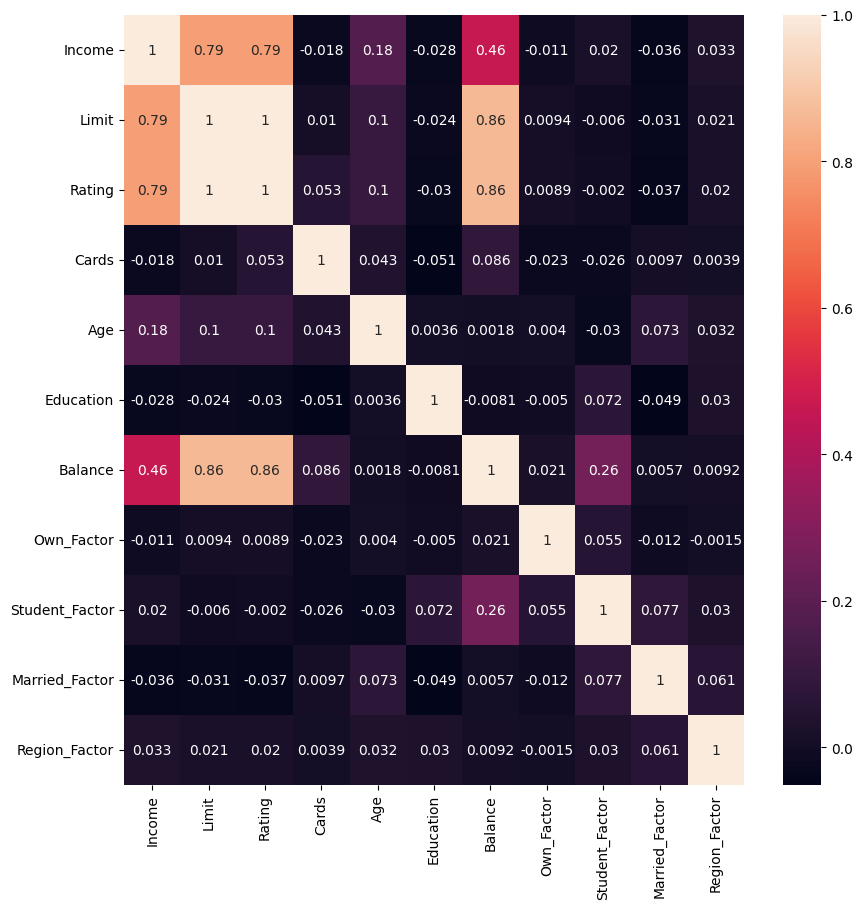

In [11]:
# drop columns of type object
credit_df2 = credit_df2.drop(columns=['Own','Student','Married','Region'])

col_corr2 = credit_df2.corr()

# check Correlation with heatmaps
plt.subplots(figsize=(10,10))
sns.heatmap(col_corr2, xticklabels=col_corr2.columns,yticklabels=col_corr2.columns,annot=True)

#### A.2.1.Keep only Income, Limit, Rating, Cards, Age, Education, and Balance as your variables and throw the rest of variables away.

In [12]:
credit_df = credit_df.drop(columns=['Own','Student','Married','Region'])

#### A.2.2.Print the dimension of this new dataset

In [13]:
credit_df.shape

(400, 7)

#### A.1.5_2. ***(repeated for the data frame with required features/columns ONLY)*** Using appropriate descriptive statistics & visualization methods describe the variables and possible association amongst them (for *credit_df* with ONLY the 7 columns [*Income, Limit, Rating, Cards, Age, Education, and Balance*] as requested in #2).

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

<Axes: >

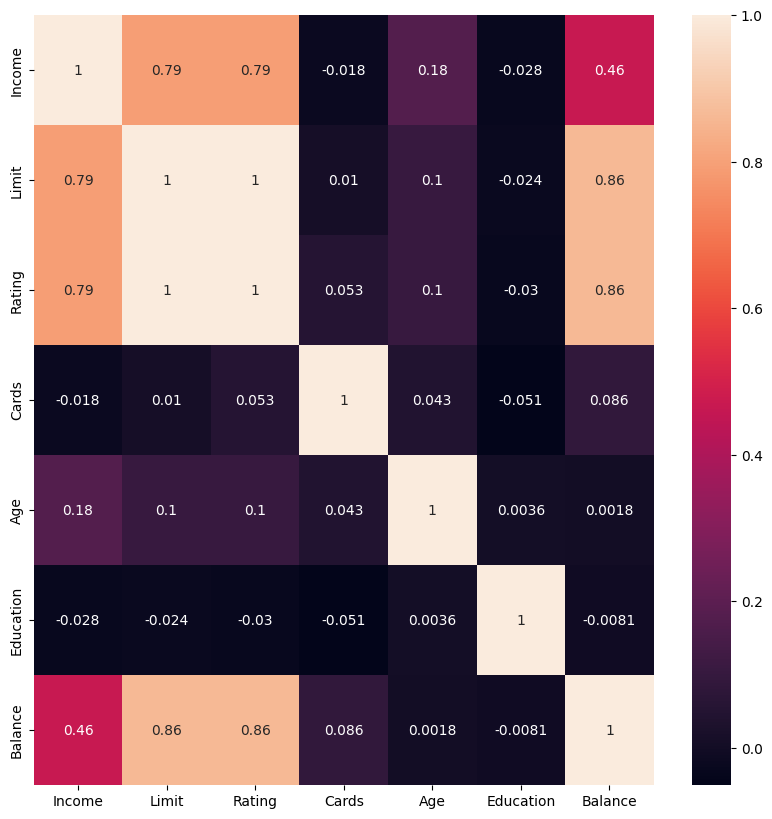

In [14]:
col_corr = credit_df.corr()

plt.subplots(figsize=(10,10))
sns.heatmap(col_corr, xticklabels=col_corr.columns,yticklabels=col_corr.columns,annot=True)

**Strong Correlation:**
*   Balance and Limit
*   Balance and Rating
*   Income and Limit
*   Income and Rating

**Moderate Correlations:**
* Balance and Income



Other Correlations are **Weak **

#### A.3.1. Create a binary variable Balance_1500 which equals  1  for the observations with Balance  >1500 , and equals  0  otherwise.

In [15]:
credit_df["Balance_1500"] = (credit_df["Balance"]>1500).factorize() [0]
#credit_df[credit_df["Balance_1500"]].unique()
credit_df["Balance_1500"].unique()

array([0, 1])

In [16]:
credit_df[credit_df["Balance_1500"]==1]

,Income,Limit,Rating,Cards,Age,Education,Balance,Balance_1500
28,186.634,13414,949,2,41,14,1809,1
85,152.298,12066,828,4,41,12,1779,1
102,68.713,7582,531,2,56,16,1587,1
139,107.841,10384,728,3,87,7,1597,1
174,121.834,10673,750,3,54,16,1573,1
191,124.290,9560,701,3,52,17,1687,1
222,33.437,6207,451,4,44,9,1549,1
293,140.672,11200,817,7,46,9,1677,1
323,182.728,13913,982,4,98,17,1999,1


In [17]:
credit_df.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Balance_1500
0,14.891,3606,283,2,34,11,333,0
1,106.025,6645,483,3,82,15,903,0
2,104.593,7075,514,4,71,11,580,0
3,148.924,9504,681,3,36,11,964,0
4,55.882,4897,357,2,68,16,331,0


#### A.4.1. Model Balance_1500 by the explanatory variables Income, Limit, Rating, Cards, Age, Education using ***logistic regression***

In [18]:
# Feeding the data in the right shape
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() #solver = 'liblinear', multi_class="auto"

X = credit_df[['Income','Limit','Rating','Cards','Age','Education']]
y = credit_df['Balance_1500']

logreg.fit(X, y)

X.shape

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

(400, 6)

In [19]:
print(logreg.intercept_)
print(logreg.coef_)

[-0.47986794]
[[-0.00226872  0.00489371 -0.05896355  0.28953066 -0.06980691 -0.37412095]]


#### A.4.2. Model Balance_1500 by the explanatory variables Income, Limit, Rating, Cards, Age, Education using ***linear discriminant***

In [20]:
# Feeding the data in the right shape
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LnrDscAnl = LinearDiscriminantAnalysis()

X = credit_df[['Income','Limit','Rating','Cards','Age','Education']]
y = credit_df['Balance_1500']

LnrDscAnl.fit(X, y)

y.shape

LinearDiscriminantAnalysis()

(400,)

#### A.4.3. Model Balance_1500 by the explanatory variables Income, Limit, Rating, Cards, Age, Education using ***quadratic discriminant***

In [21]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QdrDscAnl = QuadraticDiscriminantAnalysis()

X = credit_df[['Income','Limit','Rating','Cards','Age','Education']]
y = credit_df['Balance_1500']

QdrDscAnl.fit(X, y)

y.shape

QuadraticDiscriminantAnalysis()

(400,)

#### A.5.1. Find the probability of (Balance  >1500 ), for the following values, using ***logistic regression***
|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   |
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

In [22]:
X_pred=[[63,8100,600,4,30,13],[186,13414,950,2,41,13]]

y_pred_probs = logreg.predict_proba(X_pred)

y_pred_probs.shape
y_pred_probs
#y_pred_probs[:, 1]
print(y_pred_probs[:, 1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(2, 2)

array([[0.89674322, 0.10325678],
       [0.17074154, 0.82925846]])

[0.10325678 0.82925846]


In [23]:
# print("Probability of (Balance >1500 ), for the given values, using logistic regression are",y_pred_probs[0, 1], "and",y_pred_probs[1, 1],"respectively")

print("Probability of (Balance >1500 ), for the given values, using logistic regression are as following:")
print(y_pred_probs[0, 1], "for" , "and",y_pred_probs[1, 1],"respectively")

Probability of (Balance >1500 ), for the given values, using logistic regression are as following:
0.10325678157065321 for and 0.8292584564672354 respectively


#### A.5.2. Find the probability of (Balance  >1500 ), for the following values, using ***linear discriminant***
|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   |
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

In [24]:
X_pred=[[63,8100,600,4,30,13],[186,13414,950,2,41,13]]

y_pred_probs = LnrDscAnl.predict_proba(X_pred)

y_pred_probs.shape
y_pred_probs
#y_pred_probs[:, 1]
print(y_pred_probs[:, 1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


(2, 2)

array([[0.94050988, 0.05949012],
       [0.00721199, 0.99278801]])

[0.05949012 0.99278801]


#### A.5.3. Find the probability of (Balance  >1500 ), for the following values, using ***quadratic discriminant***
|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   |
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

In [25]:
X_pred=[[63,8100,600,4,30,13],[186,13414,950,2,41,13]]

y_pred_probs = QdrDscAnl.predict_proba(X_pred)

y_pred_probs.shape
y_pred_probs
#y_pred_probs[:, 1]
print(y_pred_probs[:, 1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


(2, 2)

array([[9.99999995e-01, 4.93626009e-09],
       [7.83057752e-04, 9.99216942e-01]])

[4.93626009e-09 9.99216942e-01]


#### A.5.4. Compare the probabilities and comment.

#### A.6.1. For ***logistic regression***, print the confusion matrix, the accuracy score and the AUC using all observations.

#### A.6.2. For ***linear discriminant***, print the confusion matrix, the accuracy score and the AUC using all observations.

#### A.6.3. For ***quadratic discriminant***, print the confusion matrix, the accuracy score and the AUC using all observations.

#### A.6.4. Compare these metrics and comment.

#==========================================================#

## **Part B** <font color="blue">(8 points)</font>

Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  **Athena/Content/Data**. Save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively. Explore the data in order to understand it.

  1. **<font color="blue">(1 point)</font>** From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`.
  2. **<font color="blue">(1 point)</font>** Project `binar_train` onto the first **two principal components** and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.
  3. **<font color="blue">(1 point)</font>** Fit a **logistic regression**, in the new space, to separate digits $2$ and $7$.
  4. **<font color="blue">(1 point)</font>** Evaluate the trainded model on `binar_test` using **accuracy**, and an **appropriate F-measure**.
  5. **<font color="blue">(0.5 points)</font>** Build and print a confusion matrix for your predictions.

For the rest of the questions use the **whole training data**, i.e., `ziptrain` (**not** `binar_train`).

  6. **<font color="blue">(1 point)</font>** Project the whole data onto the first $m=2, 3, 4, 5$ principal components (one $m$ at a time).
  7. **<font color="blue">(1.5 points)</font>** For each $m$, and using **$5$-fold cross-validation**, train a **linear discriminant** classifier on `ziptrain`.
  8. **<font color="blue">(1 point)</font>** Based on **cross-validated accuracy**, select the best number of principal components $m$.


#### B.0.1 Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  **Athena/Content/Data**. Save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively.

In [26]:
ziptrain = pd.read_csv(filepath_or_buffer=r'ziptrain.csv')
ziptest = pd.read_csv(filepath_or_buffer=r'ziptest.csv')

#### B.0.2. Explore the data in order to understand it.

In [27]:
ziptrain.head()

,6.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.6310 0.8620 -0.1670 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.9920 0.2970 1.0000 0.3070 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.4100 1.0000 0.9860 -0.5650 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.6830 0.8250 1.0000 0.5620 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.9380 0.5400 1.0000 0.7780 -0.7150 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 0.1000 1.0000 0.9220 -0.4390 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.2570 0.9500 1.0000 -0.1620 -1.0000 -1.0000 -1.0000 -0.9870 -0.7140 -0.8320 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.7970 0.9090 1.0000 0.3000 -0.9610 -1.0000 -1.0000 -0.5500 0.4850 0.9960 0.8670 0.0920 -1.0000 -1.0000 -1.0000 -1.0000 0.2780 1.0000 0.8770 -0.8240 -1.0000 -0.9050 0.1450 0.9770 1.0000 1.0000 1.0000 0.9900 -0.7450 -1.0000 -1.0000 -0.9500 0.8470 1.0000 0.3270 -1.0000 -1.0000 0.3550 1.0000 0.6550 -0.1090 -0.1850 1.0000 0.9880 -0.7230 -1.0000 -1.0000 -0.6300 1.0000 1.0000 0.0680 -0.9250 0.1130 0.9600 0.3080 -0.8840 -1.0000 -0.0750 1.0000 0.6410 -0.9950 -1.0000 -1.0000 -0.6770 1.0000 1.0000 0.7530 0.3410 1.0000 0.7070 -0.9420 -1.0000 -1.0000 0.5450 1.0000 0.0270 -1.0000 -1.0000 -1.0000 -0.9030 0.7920 1.0000 1.0000 1.0000 1.0000 0.5360 0.1840 0.8120 0.8370 0.9780 0.8640 -0.6300 -1.0000 -1.0000 -1.0000 -1.0000 -0.4520 0.8280 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 0.1350 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.4830 0.8130 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 0.2190 -0.9430 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.9740 -0.4290 0.3040 0.8230 1.0000 0.4820 -0.4740 -0.9910 -1.0000 -1.0000 -1.0000 -1.0000
0,5.0000 -1.0000 -1.0000 -1.0000 -0.8130 -0.6710...
1,4.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000...
2,7.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000...
3,3.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000...
4,6.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000...


In [28]:
ziptest.head()

,9 -1 -1 -1 -1 -1 -0.948 -0.561 0.148 0.384 0.904 0.29 -0.782 -1 -1 -1 -1 -1 -1 -1 -1 -0.748 0.588 1 1 0.991 0.915 1 0.931 -0.476 -1 -1 -1 -1 -1 -1 -0.787 0.794 1 0.727 -0.178 -0.693 -0.786 -0.624 0.834 0.756 -0.822 -1 -1 -1 -1 -0.922 0.81 1 0.01 -0.928 -1 -1 -1 -1 -0.39 1 0.271 -1 -1 -1 -1 0.012 1 0.248 -1 -1 -1 -1 -1 -0.402 0.326 1 0.801 -0.998 -1 -1 -0.981 0.645 1 -0.687 -1 -1 -1 -1 -0.792 0.976 1 1 0.413 -0.976 -1 -1 -0.993 0.834 0.897 -0.951 -1 -1 -1 -0.831 0.14 1 1 0.302 -0.889 -1 -1 -1 -1 0.356 0.794 -0.836 -1 -0.445 0.074 0.833 1 1 0.696 -0.881 -1 -1 -1 -1 -1 -0.368 0.955 1 1 1 1 0.905 1 1 -0.262 -1 -1 -1 -1 -1 -1 -1 -0.507 0.451 0.692 0.692 -0.007 -0.237 1 0.882 -0.795 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 0.155 1 0.436 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -0.991 0.703 1 -0.025 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -0.833 0.959 1 -0.629 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -0.6 0.998 0.841 -0.932 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -0.424 1 0.732 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -0.908 0.43 0.622 -0.973 -1 -1 -1 -1 -1
0,6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1...
1,3 -1 -1 -1 -0.593 0.7 1 1 1 1 0.853 0.075 -0.9...
2,6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1...
3,6 -1 -1 -1 -1 -1 -1 -1 -0.858 -0.106 0.802 -0....
4,0 -1 -1 -1 -1 -1 -1 0.195 1 0.054 -1 -1 -1 -1 ...


#### B.0.3. the csv file has the separator as a space and there is no header - so, for both files/data sets
1.   use appropriate parameters to read the CSV
2.   First column is a digit (so cast.change data type to integer)
3.   Change headers/column names so that first column is for the digit and then add "pxl" as prefix to the name to each of the other columns so column name will be pxl_*column_number*



In [29]:
# the csv file has the separator as a space and there is no header - so, use appropriate parameters to read the CSV
ziptrain = pd.read_csv(filepath_or_buffer=r'ziptrain.csv',delim_whitespace=True, header=None)
ziptest = pd.read_csv(filepath_or_buffer=r'ziptest.csv',delim_whitespace=True, header=None)

# first column is integer
ziptrain[0] = ziptrain[0].astype(int)
ziptest[0] = ziptest[0].astype(int)
#ziptrain.columns[0]
ziptrain.rename({ziptrain.columns[0]:"digit"},axis=1,inplace=True)
#ziptrain.columns[0]
ziptest.rename({ziptest.columns[0]:"digit"},axis=1,inplace=True)
# [0] = ['Digit']
# [0] = ziptrain.columns[0] = 'Digit'

# Change headers/column names so that first column is for the digit and then add "pxl" as prefix to the name to each of the other columns so column name will be pxl_column_number
#ziptrain.columns[1]
for i in range(256):
  ziptrain.rename({ziptrain.columns[i+1]:"pxl_"+str(i)},axis=1,inplace=True)
  ziptest.rename({ziptest.columns[i+1]:"pxl_"+str(i)},axis=1,inplace=True)

In [30]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [31]:
def explore_data(df):
  print("===> df.head() for" , get_df_name(df))
  print(df.head())
  print("====================================================")

  print("===> df.shape for" , get_df_name(df))
  print(df.shape)
  print("====================================================")

  print("===> df.info() for" , get_df_name(df))
  print(df.info())
  print("====================================================")

  print("===> df.describe() for" , get_df_name(df))
  print(df.describe())
  print("====================================================")

  print("===> df['digit'].unique() for", get_df_name(df))
  print(df['digit'].unique())
  print("====================================================")

In [32]:
explore_data(ziptrain)

===> df.head() for ziptrain
   digit  pxl_0  pxl_1  pxl_2  pxl_3  pxl_4  pxl_5  pxl_6  pxl_7  pxl_8  ...  \
0      6   -1.0   -1.0   -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862  ...   
1      5   -1.0   -1.0   -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853  ...   
2      4   -1.0   -1.0   -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000  ...   
3      7   -1.0   -1.0   -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ...   
4      3   -1.0   -1.0   -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  ...   

   pxl_246  pxl_247  pxl_248  pxl_249  pxl_250  pxl_251  pxl_252  pxl_253  \
0    0.304    0.823    1.000    0.482   -0.474   -0.991   -1.000   -1.000   
1   -0.671   -0.671   -0.033    0.761    0.762    0.126   -0.095   -0.671   
2   -1.000   -1.000   -1.000   -0.109    1.000   -0.179   -1.000   -1.000   
3   -0.318    1.000    0.536   -0.987   -1.000   -1.000   -1.000   -1.000   
4    0.466    0.639    1.000    1.000    0.791    0.439   -0.199   -0.883   

   pxl_254  pxl_255  
0   -1

In [33]:
explore_data(ziptest)

===> df.head() for ziptest
   digit  pxl_0  pxl_1  pxl_2  pxl_3  pxl_4  pxl_5  pxl_6  pxl_7  pxl_8  ...  \
0      9   -1.0   -1.0   -1.0 -1.000   -1.0 -0.948 -0.561  0.148  0.384  ...   
1      6   -1.0   -1.0   -1.0 -1.000   -1.0 -1.000 -1.000 -1.000 -1.000  ...   
2      3   -1.0   -1.0   -1.0 -0.593    0.7  1.000  1.000  1.000  1.000  ...   
3      6   -1.0   -1.0   -1.0 -1.000   -1.0 -1.000 -1.000 -1.000 -1.000  ...   
4      6   -1.0   -1.0   -1.0 -1.000   -1.0 -1.000 -1.000 -0.858 -0.106  ...   

   pxl_246  pxl_247  pxl_248  pxl_249  pxl_250  pxl_251  pxl_252  pxl_253  \
0   -1.000   -0.908    0.430    0.622   -0.973   -1.000     -1.0     -1.0   
1   -1.000   -1.000   -1.000   -1.000   -1.000   -1.000     -1.0     -1.0   
2    1.000    0.717    0.333    0.162   -0.393   -1.000     -1.0     -1.0   
3   -1.000   -1.000   -1.000   -1.000   -1.000   -1.000     -1.0     -1.0   
4    0.901    0.901    0.901    0.290   -0.369   -0.867     -1.0     -1.0   

   pxl_254  pxl_255  
0     -

#### B.1.0. From ziptrain dataset select only the rows corresponding to digits  2  and  7  and save them in a new dataset called binar_train.

In [34]:
binar_train = ziptrain[(ziptrain["digit"]==2) | (ziptrain["digit"]==7)]

explore_data(binar_train)

===> df.head() for binar_train
    digit  pxl_0  pxl_1  pxl_2  pxl_3  pxl_4  pxl_5  pxl_6  pxl_7  pxl_8  ...  \
3       7   -1.0   -1.0   -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ...   
10      7   -1.0   -1.0   -1.0 -1.000 -1.000 -0.596  0.912  1.000  0.290  ...   
14      7   -1.0   -1.0   -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -0.632  ...   
15      7   -1.0   -1.0   -1.0 -0.929  0.351  0.798  0.806  0.114  0.015  ...   
22      7   -1.0   -1.0   -1.0 -1.000 -0.869  0.777 -0.007 -0.697 -1.000  ...   

    pxl_246  pxl_247  pxl_248  pxl_249  pxl_250  pxl_251  pxl_252  pxl_253  \
3    -0.318    1.000    0.536   -0.987     -1.0     -1.0     -1.0     -1.0   
10   -1.000   -0.795    0.663   -0.074     -1.0     -1.0     -1.0     -1.0   
14   -1.000   -0.967    0.866   -0.001     -1.0     -1.0     -1.0     -1.0   
15    0.835   -0.086   -0.991   -1.000     -1.0     -1.0     -1.0     -1.0   
22   -0.933    0.667   -0.315   -1.000     -1.0     -1.0     -1.0     -1.0   

    pxl_254  

#### B.1.1. Do the same thing in ziptest and call it binar_test

In [35]:
binar_test = ziptest[(ziptest["digit"]==2) | (ziptest["digit"]==7)]
explore_data(ziptest)

===> df.head() for ziptest
   digit  pxl_0  pxl_1  pxl_2  pxl_3  pxl_4  pxl_5  pxl_6  pxl_7  pxl_8  ...  \
0      9   -1.0   -1.0   -1.0 -1.000   -1.0 -0.948 -0.561  0.148  0.384  ...   
1      6   -1.0   -1.0   -1.0 -1.000   -1.0 -1.000 -1.000 -1.000 -1.000  ...   
2      3   -1.0   -1.0   -1.0 -0.593    0.7  1.000  1.000  1.000  1.000  ...   
3      6   -1.0   -1.0   -1.0 -1.000   -1.0 -1.000 -1.000 -1.000 -1.000  ...   
4      6   -1.0   -1.0   -1.0 -1.000   -1.0 -1.000 -1.000 -0.858 -0.106  ...   

   pxl_246  pxl_247  pxl_248  pxl_249  pxl_250  pxl_251  pxl_252  pxl_253  \
0   -1.000   -0.908    0.430    0.622   -0.973   -1.000     -1.0     -1.0   
1   -1.000   -1.000   -1.000   -1.000   -1.000   -1.000     -1.0     -1.0   
2    1.000    0.717    0.333    0.162   -0.393   -1.000     -1.0     -1.0   
3   -1.000   -1.000   -1.000   -1.000   -1.000   -1.000     -1.0     -1.0   
4    0.901    0.901    0.901    0.290   -0.369   -0.867     -1.0     -1.0   

   pxl_254  pxl_255  
0     -